# Note: MM used for all models is single population, no geo model is used

In [1]:
# Template for creating an IPM

# import dependencies

# define function that creates IPM
    # define the symbols (compartments and parameters) to be used in the model using create_symbols

        # define compartments (i.e. S, I, R)

        # define parameters (i.e. beta, gamma, theta)

    # specify created symbols as comaprtments/parameters

    # formulate N to avoid dividing by zero N = max(number of individuals, 1)

    # define the directed edges in the model and their rates of change using create_model, return result
        # set the symbols to our created set

        # define the transitions using edges

# call creation function, set result into an IPM variable

# 1. Building an SIR IPM

Using epymorph's model definition features, we can construct an SIR model with suitable parameters.

![SIR model diagram](img/SIR-model.png)

The differential equations for this model are as follows:

$$
\begin{aligned}
& \frac{dS}{dt} = -\frac{\beta S I}{N} \\
& \frac{dI}{dt} = \frac{\beta S I}{N} - \gamma I \\
& \frac{dR}{dt} = \gamma I \\
\end{aligned}
$$


In [1]:
from sympy import Max

from epymorph import *
from epymorph.compartment_model import *


def construct_ipm():
    symbols = create_symbols(
        compartments=[
            compartment('S'),
            compartment('I'),
            compartment('R'),
        ],
        attributes=[
            param('beta', shape=Shapes.TxN),
            param('gamma', shape=Shapes.TxN),
        ])

    [S, I, R] = symbols.compartment_symbols
    [β, γ] = symbols.attribute_symbols

    # formulate N so as to avoid dividing by zero;
    # this is safe in this instance because if the denominator is zero,
    # the numerator must also be zero
    N = Max(1, S + I + R)

    return create_model(
        symbols=symbols,
        transitions=[
            edge(S, I, rate=β * S * I / N),
            edge(I, R, rate=γ * I),
        ]
    )


sir_ipm = construct_ipm()

## Low Beta

Running simulation (StandardSimulation):
• 2015-01-01 to 2015-05-31 (150 days)
• 1 geo nodes
|####################| 100% 
Runtime: 0.016s


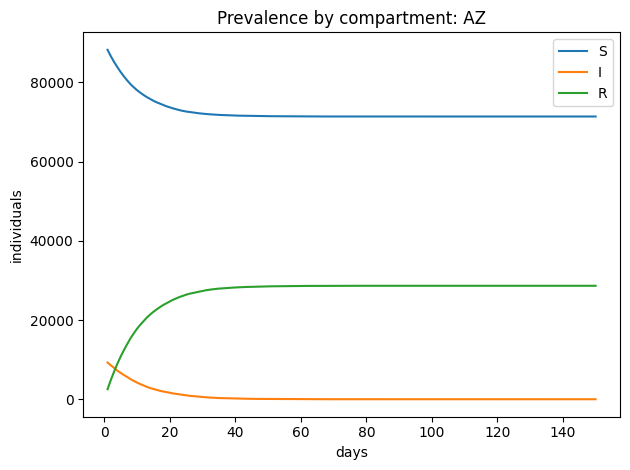

In [6]:
from functools import partial

from epymorph.initializer import single_location

sim = StandardSimulation(
    geo=geo_library['single_pop'](),
    ipm=sir_ipm,
    mm=mm_library['no'](),
    params={
        'beta': 0.20,
        'gamma': 0.25,
    },
    time_frame=TimeFrame.of("2015-01-01", 150),
    initializer=partial(single_location, location=0, seed_size=10_000)
)

with sim_messaging(sim):
    output = sim.run()

plot_pop(output, pop_idx=0)

## High beta

Running simulation (StandardSimulation):
• 2015-01-01 to 2015-05-31 (150 days)
• 1 geo nodes
|####################| 100% 
Runtime: 0.022s


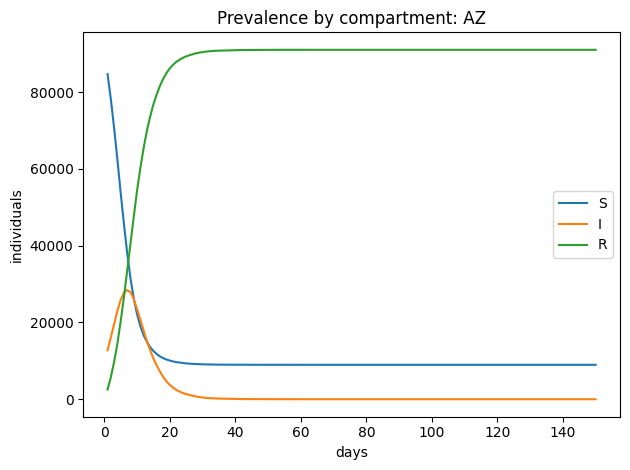

In [5]:
from functools import partial

from epymorph.initializer import single_location

sim = StandardSimulation(
    geo=geo_library['single_pop'](),
    ipm=sir_ipm,
    mm=mm_library['no'](),
    params={
        'beta': 0.60,
        'gamma': 0.25,
    },
    time_frame=TimeFrame.of("2015-01-01", 150),
    initializer=partial(single_location, location=0, seed_size=10_000)
)

with sim_messaging(sim):
    output = sim.run()

plot_pop(output, pop_idx=0)

## Low Gamma

Running simulation (StandardSimulation):
• 2015-01-01 to 2015-05-31 (150 days)
• 1 geo nodes
|####################| 100% 
Runtime: 0.035s


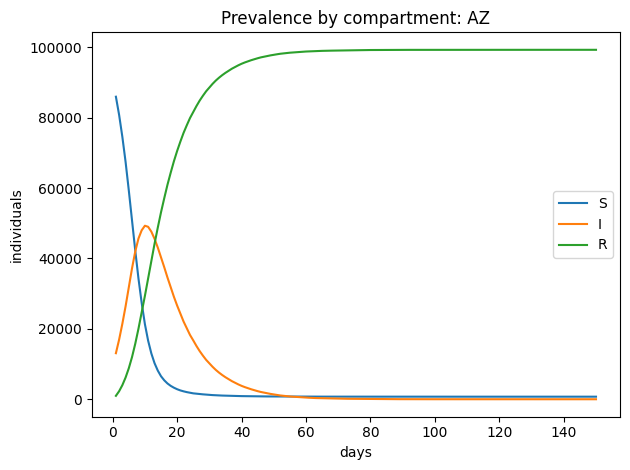

In [28]:
from functools import partial

from epymorph.initializer import single_location

sim = StandardSimulation(
    geo=geo_library['single_pop'](),
    ipm=sir_ipm,
    mm=mm_library['no'](),
    params={
        'beta': 0.45,
        'gamma': 0.1,
    },
    time_frame=TimeFrame.of("2015-01-01", 150),
    initializer=partial(single_location, location=0, seed_size=10_000)
)

with sim_messaging(sim):
    output = sim.run()

plot_pop(output, pop_idx=0)

## High Gamma

Running simulation (StandardSimulation):
• 2015-01-01 to 2015-05-31 (150 days)
• 1 geo nodes
|####################| 100% 
Runtime: 0.029s


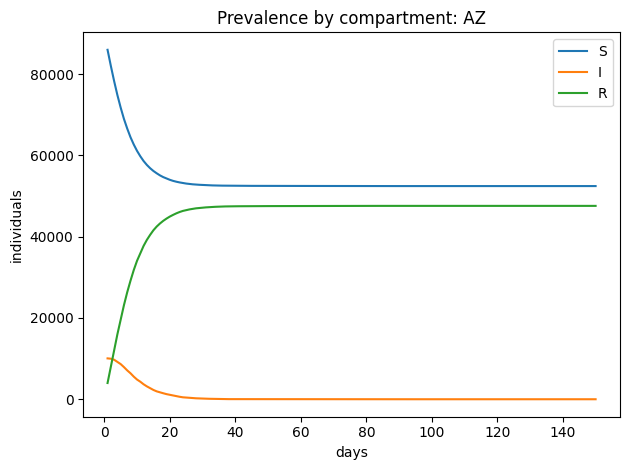

In [8]:
from functools import partial

from epymorph.initializer import single_location

sim = StandardSimulation(
    geo=geo_library['single_pop'](),
    ipm=sir_ipm,
    mm=mm_library['no'](),
    params={
        'beta': 0.45,
        'gamma': 0.4,
    },
    time_frame=TimeFrame.of("2015-01-01", 150),
    initializer=partial(single_location, location=0, seed_size=10_000)
)

with sim_messaging(sim):
    output = sim.run()

plot_pop(output, pop_idx=0)

# 2. Building an SIRV IPM (S goes to V)

In this update, a vaccinated compartment is added, where S can transition to V

![SIRV model diagram](img/SIRV-model.png)

The differential equations for this model are as follows:

$$
\begin{aligned}
& \frac{dS}{dt} = -\frac{\beta S I}{N} -\theta S\\
& \frac{dI}{dt} = \frac{\beta S I}{N} - \gamma I \\
& \frac{dR}{dt} = \gamma I \\
& \frac{dV}{dt} = \theta S \\
\end{aligned}
$$

In [38]:
from sympy import Max

from epymorph import *
from epymorph.compartment_model import *


def construct_ipm():
    symbols = create_symbols(
        compartments=[
            compartment('S'),
            compartment('I'),
            compartment('R'),
            compartment('V'), # add the vaccinated compartment
        ],
        attributes=[
            param('beta', shape=Shapes.TxN),
            param('gamma', shape=Shapes.TxN),
            param('theta', shape=Shapes.TxN), # add a parameter to simulate the vaccination rate
        ])

    [S, I, R, V] = symbols.compartment_symbols
    [β, γ, θ] = symbols.attribute_symbols

    # formulate N so as to avoid dividing by zero;
    # this is safe in this instance because if the denominator is zero,
    # the numerator must also be zero
    N = Max(1, S + I + R + V)

    return create_model(
        symbols=symbols,
        transitions=[
            edge(S, I, rate=β * S * I / N),
            edge(I, R, rate=γ * I),
            edge(S, V, rate=θ * S), # add an edge for susceptible individuals becoming vaccinated
        ]
    )


sirv_ipm = construct_ipm()

## Low Theta

In [37]:
from functools import partial

from epymorph.initializer import single_location

sim = StandardSimulation(
    geo=geo_library['single_pop'](),
    ipm=sirv_ipm,
    mm=mm_library['no'](),
    params={
        'beta': 0.45,
        'gamma': 0.25,
        'theta': 0.01
    },
    time_frame=TimeFrame.of("2015-01-01", 150),
    initializer=partial(single_location, location=0, seed_size=10_000)
)

with sim_messaging(sim):
    output = sim.run()

plot_pop(output, pop_idx=0)

Running simulation (StandardSimulation):
• 2015-01-01 to 2015-05-31 (150 days)
• 1 geo nodes



KeyboardInterrupt



## High Theta

Running simulation (StandardSimulation):
• 2015-01-01 to 2015-05-31 (150 days)
• 1 geo nodes
|####################| 100% 
Runtime: 0.057s


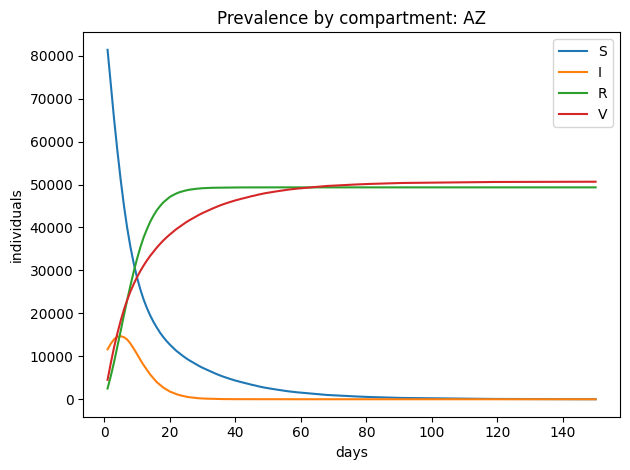

In [41]:
from functools import partial

from epymorph.initializer import single_location

sim = StandardSimulation(
    geo=geo_library['single_pop'](),
    ipm=sirv_ipm,
    mm=mm_library['no'](),
    params={
        'beta': 0.45,
        'gamma': 0.25,
        'theta': 0.05
    },
    time_frame=TimeFrame.of("2015-01-01", 150),
    initializer=partial(single_location, location=0, seed_size=10_000)
)

with sim_messaging(sim):
    output = sim.run()

plot_pop(output, pop_idx=0)

# 3. Building an SIRV IPM (S goes to V, V goes back to S)

In this update, vaccinated individuals can return to being susceptible

![SIRV-1 model diagram](img/SIRV-1-model.png)

The differential equations for this model are as follows:

$$
\begin{aligned}
& \frac{dS}{dt} = -\frac{\beta S I}{N} -\theta S + \phi V\\
& \frac{dI}{dt} = \frac{\beta S I}{N} - \gamma I \\
& \frac{dR}{dt} = \gamma I \\
& \frac{dV}{dt} = \theta S - \phi V\\
\end{aligned}
$$

In [42]:
from sympy import Max

from epymorph import *
from epymorph.compartment_model import *


def construct_ipm():
    symbols = create_symbols(
        compartments=[
            compartment('S'),
            compartment('I'),
            compartment('R'),
            compartment('V'),
        ],
        attributes=[
            param('beta', shape=Shapes.TxN),
            param('gamma', shape=Shapes.TxN),
            param('theta', shape=Shapes.TxN),
            param('phi', shape=Shapes.TxN), # add a parameter to simulate the rate at which vaccinated become susceptible
        ])

    [S, I, R, V] = symbols.compartment_symbols
    [β, γ, θ, φ] = symbols.attribute_symbols

    # formulate N so as to avoid dividing by zero;
    # this is safe in this instance because if the denominator is zero,
    # the numerator must also be zero
    N = Max(1, S + I + R + V)

    return create_model(
        symbols=symbols,
        transitions=[
            edge(S, I, rate=β * S * I / N),
            edge(I, R, rate=γ * I),
            edge(S, V, rate=θ * S),
            edge(V, S, rate = φ * V), # add an edge for vaccinated individuals becoming susceptible again
        ]
    )


sirv_ipm = construct_ipm()

## Low Phi

Running simulation (StandardSimulation):
• 2015-01-01 to 2015-05-31 (150 days)
• 1 geo nodes
|####################| 100% 
Runtime: 0.033s


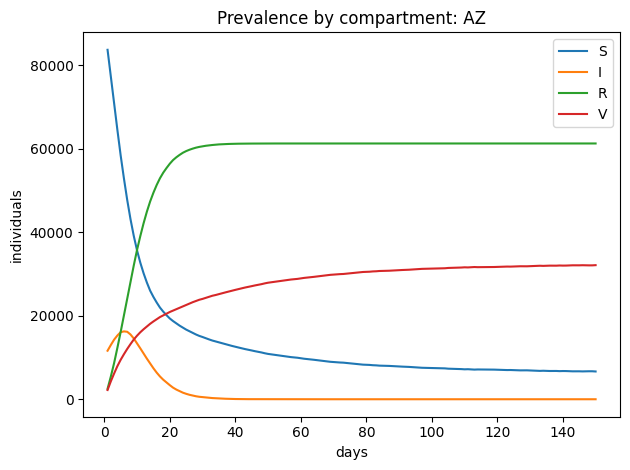

In [44]:
from functools import partial

from epymorph.initializer import single_location

sim = StandardSimulation(
    geo=geo_library['single_pop'](),
    ipm=sirv_ipm,
    mm=mm_library['no'](),
    params={
        'beta': 0.45,
        'gamma': 0.25,
        'theta': 0.025,
        'phi': 0.005,
    },
    time_frame=TimeFrame.of("2015-01-01", 150),
    initializer=partial(single_location, location=0, seed_size=10_000)
)

with sim_messaging(sim):
    output = sim.run()

plot_pop(output, pop_idx=0)

## High Phi

Running simulation (StandardSimulation):
• 2015-01-01 to 2015-05-31 (150 days)
• 1 geo nodes
|####################| 100% 
Runtime: 0.053s


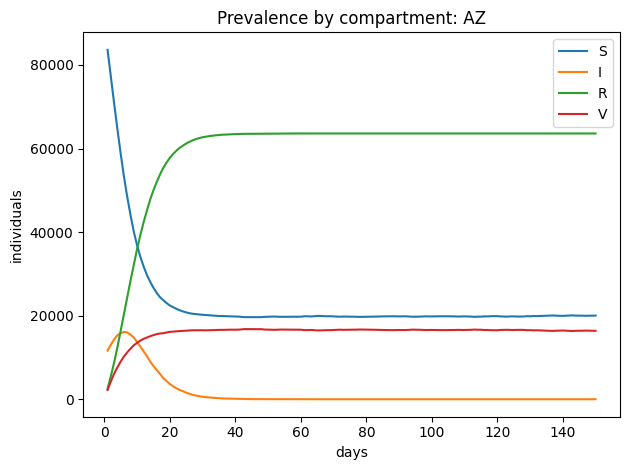

In [45]:
from functools import partial

from epymorph.initializer import single_location

sim = StandardSimulation(
    geo=geo_library['single_pop'](),
    ipm=sirv_ipm,
    mm=mm_library['no'](),
    params={
        'beta': 0.45,
        'gamma': 0.25,
        'theta': 0.025,
        'phi': 0.03,
    },
    time_frame=TimeFrame.of("2015-01-01", 150),
    initializer=partial(single_location, location=0, seed_size=10_000)
)

with sim_messaging(sim):
    output = sim.run()

plot_pop(output, pop_idx=0)

# 4. Building an SIRV IPM (S goes to V, V goes back to S, R goes to S)

In this update, recovered individuals can become susceptible again

![SIRV-2 model diagram](img/SIRV-2-model.png)

The differential equations for this model are as follows:

$$
\begin{aligned}
& \frac{dS}{dt} = -\frac{\beta S I}{N} -\theta S + \phi V + \mu R\\
& \frac{dI}{dt} = \frac{\beta S I}{N} - \gamma I \\
& \frac{dR}{dt} = \gamma I - \mu R\\
& \frac{dV}{dt} = \theta S - \phi V\\
\end{aligned}
$$

In [48]:
from sympy import Max

from epymorph import *
from epymorph.compartment_model import *


def construct_ipm():
    symbols = create_symbols(
        compartments=[
            compartment('S'),
            compartment('I'),
            compartment('R'),
            compartment('V'),
        ],
        attributes=[
            param('beta', shape=Shapes.TxN),
            param('gamma', shape=Shapes.TxN),
            param('theta', shape=Shapes.TxN),
            param('phi', shape=Shapes.TxN),
            param('mu', shape=Shapes.TxN), # add a parameter for the rate at whcih recovered become susceptible again
        ])

    [S, I, R, V] = symbols.compartment_symbols
    [β, γ, θ, φ, μ] = symbols.attribute_symbols

    # formulate N so as to avoid dividing by zero;
    # this is safe in this instance because if the denominator is zero,
    # the numerator must also be zero
    N = Max(1, S + I + R + V)

    return create_model(
        symbols=symbols,
        transitions=[
            edge(S, I, rate=β * S * I / N),
            edge(I, R, rate=γ * I),
            edge(S, V, rate=θ * S),
            edge(R, S, rate=μ * R), # add an edge for recovered indidivudals becoming susceptible again
            edge(V, S, rate = φ * V),
        ]
    )


sirv_ipm = construct_ipm()

## Low Mu

Running simulation (StandardSimulation):
• 2015-01-01 to 2015-05-31 (150 days)
• 1 geo nodes
|####################| 100% 
Runtime: 0.062s


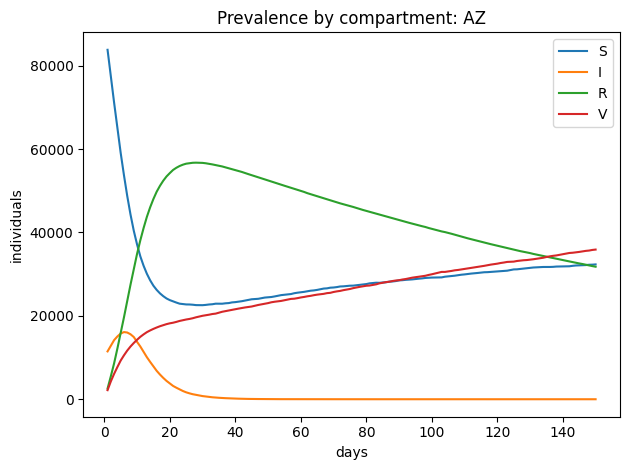

In [65]:
from functools import partial

from epymorph.initializer import single_location

sim = StandardSimulation(
    geo=geo_library['single_pop'](),
    ipm=sirv_ipm,
    mm=mm_library['no'](),
    params={
        'beta': 0.45,
        'gamma': 0.25,
        'theta': 0.025,
        'phi': 0.01,
        'mu': 0.005,
    },
    time_frame=TimeFrame.of("2015-01-01", 150),
    initializer=partial(single_location, location=0, seed_size=10_000)
)

with sim_messaging(sim):
    output = sim.run()

plot_pop(output, pop_idx=0)

## High Mu

Running simulation (StandardSimulation):
• 2015-01-01 to 2015-05-31 (150 days)
• 1 geo nodes
|####################| 100% 
Runtime: 0.050s


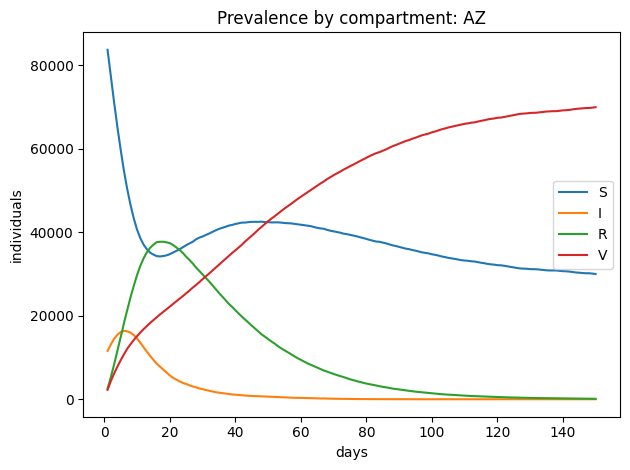

In [72]:
from functools import partial

from epymorph.initializer import single_location

sim = StandardSimulation(
    geo=geo_library['single_pop'](),
    ipm=sirv_ipm,
    mm=mm_library['no'](),
    params={
        'beta': 0.45,
        'gamma': 0.25,
        'theta': 0.025,
        'phi': 0.01,
        'mu': 0.05,
    },
    time_frame=TimeFrame.of("2015-01-01", 150),
    initializer=partial(single_location, location=0, seed_size=10_000)
)

with sim_messaging(sim):
    output = sim.run()

plot_pop(output, pop_idx=0)

Running simulation (StandardSimulation):
• 2015-01-01 to 2015-05-31 (150 days)
• 1 geo nodes
|####################| 100% 
Runtime: 0.050s


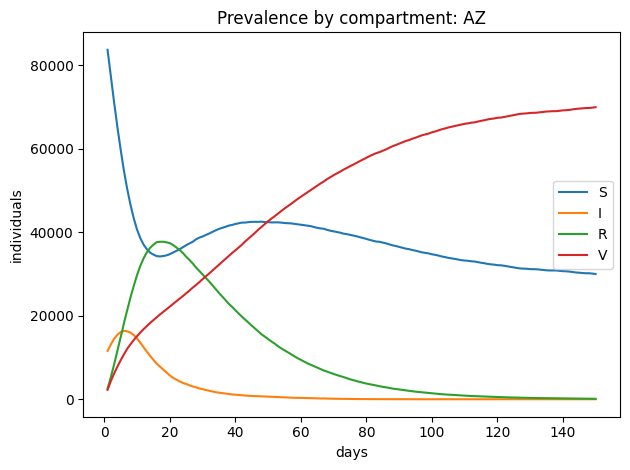

In [ ]:
from functools import partial

from epymorph.initializer import single_location

sim = StandardSimulation(
    geo=geo_library['single_pop'](),
    ipm=sirv_ipm,
    mm=mm_library['no'](),
    params={
        'beta': 0.45,
        'gamma': 0.25,
        'theta': 0.025,
        'phi': 0.01,
        'mu': 0.05,
    },
    time_frame=TimeFrame.of("2015-01-01", 150),
    initializer=partial(single_location, location=0, seed_size=10_000)
)

with sim_messaging(sim):
    output = sim.run()

plot_pop(output, pop_idx=0)